# Chapter 3 Exercises
## Conceptual

#### Q1
Low p-values for TV and radio indicate strong relationship with the sales, high p-value of newspaper indicate weak relationship with the sales or the null hypothesis is true.

#### Q2
In kNN classification, the predicted values are qualitative. The k nearest points are checked and the most common value is returned as the prediction. In kNN regression, the predicted values are qualitative. The k nearest points are evaluated and the average of these values is returned as the prediction

#### Q3
#### (a)
Option iii is correct, the inclusion of the interaction term between GPA and gender results in the coefficient of gender being dependent on GPA (35 - 10 * GPA)
#### (b)
Plugging the values, we get: 137.1
#### (c)
Interaction effect is verified using p-value, not value of coefficient

#### Q4
#### (a)
RSS for training data would be lower for cubical model since it is more flexible, hence would fit the data more closely and follow the error terms more than linear model
#### (b)
RSS for test data would be lower for linear model, since if the true f is linear, bias decreases only slightly, variance increases heavily as flexibilty increases.
#### (c)
Same as part (a)
#### (d)
Did not get



#### Q5 
Done on paper



#### Q6
Done on paper. Substituting formulas for beta0, beta1, and then substituting xbar and ybar, we get an identity, which is indicative the the regression line always passes through the point of mean values



#### Q7
Did not get

## Applied

## Q8

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

In [3]:
df = pd.read_csv(r'.\Data Sets\Auto.csv').dropna()
auto = df[['mpg', 'horsepower']]

In [4]:
x = auto.loc[:, auto.columns=='horsepower']
y = auto.loc[:, auto.columns=='mpg']
X = sm.add_constant(x)

### Part (a)

In [5]:
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Wed, 21 Apr 2021   Prob (F-statistic):           7.03e-81
Time:                        18:43:18   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

Relationship exists between predictor and response, since null hypothesis is rejected by the p-value.

Model fits the data well, since R squared is quite high, which indicates 60% variability in MPG is explained by the horsepower.

Relationship is negative

In [6]:
print('Model prediction for horsepower=98: {}'.format(result.predict([[1, 98]])[0]))

Model prediction for horsepower=98: 24.467077152512424


In [7]:
beta1 = result.params[1]
stderr1 = result.bse[1]
print('95% confidence interval: [{}, {}]'.format(beta1 - 2*stderr1, beta1 + 2*stderr1))

95% confidence interval: [-0.17073573438902362, -0.1449537323182835]


### Part (b)

C:\Users\pranj\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


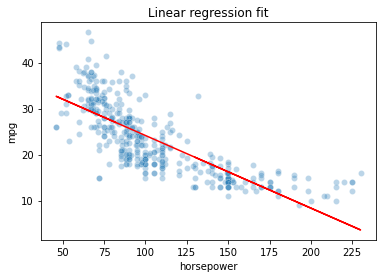

In [8]:
predicted_values = result.predict(X)

sns.scatterplot('horsepower', 'mpg', data=auto, alpha=0.3)
plt.plot(x, predicted_values, color='red')
plt.title('Linear regression fit')
plt.show;

### Part (c)

C:\Users\pranj\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


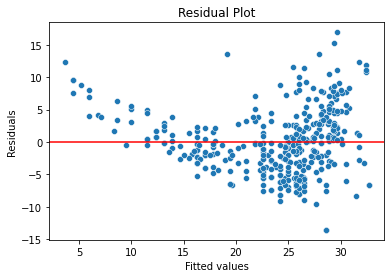

In [9]:
residuals = result.resid
sns.scatterplot(predicted_values, residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='red');

U-shaped fit to the residuals, which indicates non-linearity

Funnel shaped plot indicates non-constant variance of errors

Average leverage:  0.025510204081632654


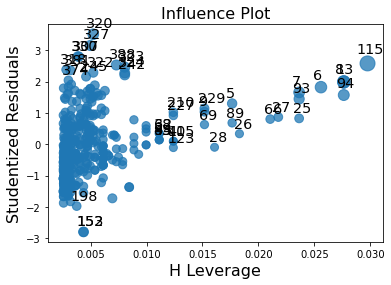

In [10]:
sm.graphics.influence_plot(result, criterion='cooks', size=15);
avg_lvg = (len(df.columns) + 1)/len(df)
print('Average leverage: ', (avg_lvg))

Evidence of outliers (some points have studentized residuals > 3) and high leverage points (leverage > avg_lvg) 

To reduce non-constant variance of irreducible error

In [11]:
model = sm.OLS(np.log(y.values), X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     864.7
Date:                Wed, 21 Apr 2021   Prob (F-statistic):          5.39e-101
Time:                        18:43:21   Log-Likelihood:                 96.145
No. Observations:                 392   AIC:                            -188.3
Df Residuals:                     390   BIC:                            -180.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8645      0.028    139.194      0.0

C:\Users\pranj\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


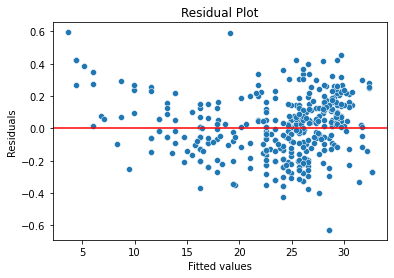

In [12]:
residuals = result.resid
sns.scatterplot(predicted_values, residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='red');

## Q9

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

In [11]:
df = pd.read_csv(r'.\Data Sets\Auto.csv').dropna()

### Part (a)

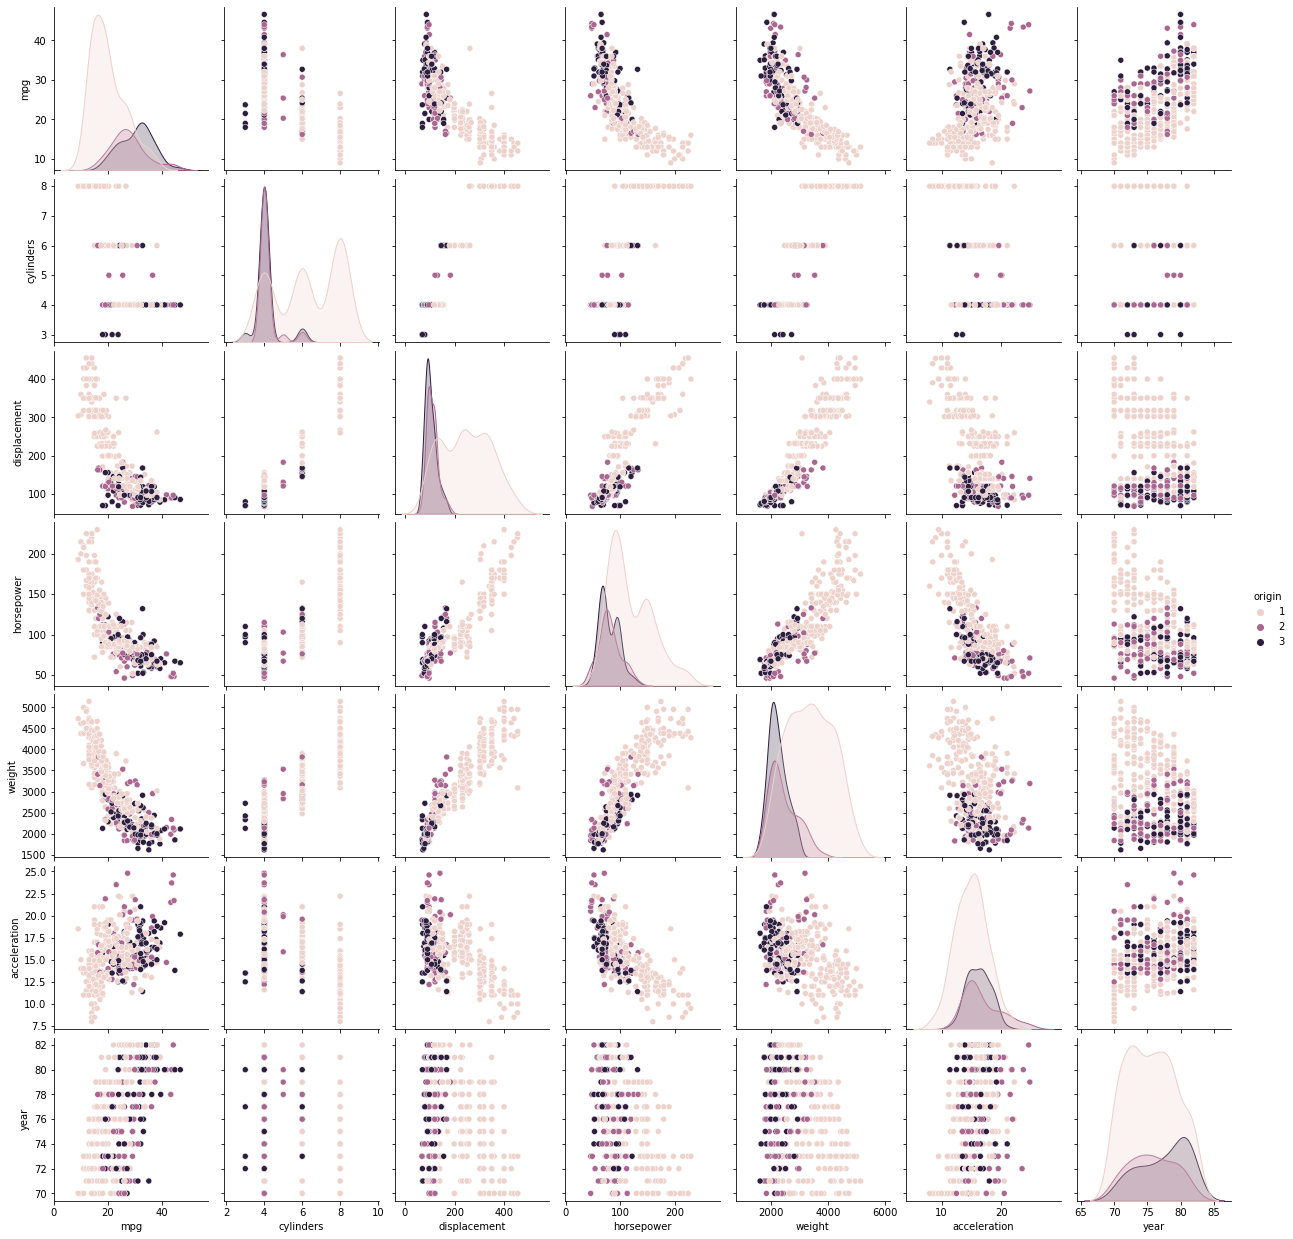

In [12]:
sns.pairplot(df, hue='origin')
plt.show();

### Part (b)

In [13]:
print('Correlations Matrix: ')
df.loc[:, df.columns != 'name'].corr()

Correlations Matrix: 


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


### Part (c)

In [14]:
x = df.loc[:, df.columns != 'mpg']
x = x.loc[:, x.columns != 'name']
y = df['mpg']

In [15]:
X = sm.add_constant(x)
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Mon, 19 Apr 2021   Prob (F-statistic):          2.04e-139
Time:                        08:07:45   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

F-statistic is quite high, which indicates a relationship between the predictors and response.

Predictors with low p-values (displacement, weight, year, origin) are statistically zero.

The coefficient of the year variable suggests that mpg increases by 0.75 every next year of manufacturing

### Part (d)

C:\Users\pranj\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


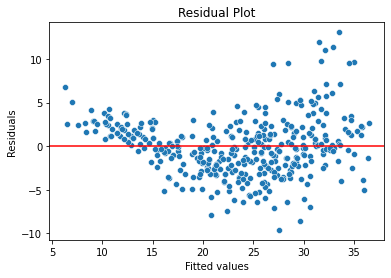

In [16]:
predicted_y = result.predict(X)
residuals = result.resid
sns.scatterplot(predicted_y, residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='red');

U-shaped fit to the residuals, which indicates non-linearity. 

Funnel shaped plot indicates non constant variance in errors

Figure(432x288)
Average leverage:  0.025510204081632654


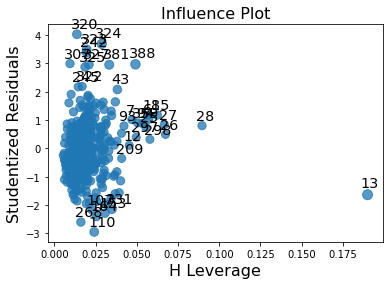

In [17]:
print(sm.graphics.influence_plot(result, criterion='cooks', size=10));
avg_lvg = (len(df.columns) + 1)/len(df)
print('Average leverage: ', (avg_lvg))

Evidence of outliers (some points have studentized residuals > 3) and high leverage points (leverage > avg_lvg) 

### Part (e)

In [18]:
# including interaction between displacement and horsepower

x1 = df.loc[:, df.columns == 'displacement']
x2 = df.loc[:, df.columns == 'horsepower']
inter = x1.values * x2.values

X_inter = sm.add_constant(np.concatenate((x1, x2, inter), axis=1))
model = sm.OLS(y, X_inter)
result = model.fit()
print('P-values of the interaction term:')
print(result.pvalues[3])
print('\nR-squared:')
print(result.rsquared)

P-values of the interaction term:
1.68162515100875e-25

R-squared:
0.7465843639484143


In [19]:
# including interaction between weight and horsepower

x1 = df.loc[:, df.columns == 'weight']
x2 = df.loc[:, df.columns == 'horsepower']
inter = x1.values*x2.values
X_inter = sm.add_constant(np.concatenate((x1, x2, inter), axis=1))
model = sm.OLS(y, X_inter)
result = model.fit()
print('P-values of the interaction term:')
print(result.pvalues[3])
print('\nR-squared:')
print(result.rsquared)

P-values of the interaction term:
9.933616647162682e-15

R-squared:
0.7484351450253209


Both example interactions have p-values apporximately eqaul to 0

### Part (f)

Lets perform transformations for one feature: horsepower

In [20]:
# square tranformation

x1 = df.loc[:, df.columns == 'horsepower']
x1_sq = x1.values * x1.values
X_quad = sm.add_constant(np.concatenate((x1, x1_sq), axis=1))
model = sm.OLS(y, X_quad)
result = model.fit()
print('P-value of the squared Horsepower term:')
print(result.pvalues[2])
print('\nR-squared:')
print(result.rsquared)

P-value of the squared Horsepower term:
2.1963396598857562e-21

R-squared:
0.6875590305127516


Value of R-sqaured increases from 0.606 in the linear model (from previous question) to 0.687 in the quadratic model

In [21]:
# log tranformation

x1 = df.loc[:, df.columns == 'horsepower']
x1_log = np.log(x1.values)
X_log = sm.add_constant(np.concatenate((x1, x1_log), axis=1))
model = sm.OLS(y, X_log)
result = model.fit()
print('P-value of the log of Horsepower term:')
print(result.pvalues[2])
print('\nR-squared:')
print(result.rsquared)

P-value of the log of Horsepower term:
8.368920990425454e-20

R-squared:
0.6817155385106666


Value of R-sqaured increases from 0.606 in the linear model (from previous question) to 0.681 in the quadratic model

In [22]:
# square-root tranformation

x1 = df.loc[:, df.columns == 'horsepower']
x1_sqrt = np.sqrt(x1.values)
X_sqrt = sm.add_constant(np.concatenate((x1, x1_sqrt), axis=1))
model = sm.OLS(y, X_sqrt)
result = model.fit()
print('P-value of the square rooted Horsepower term:')
print(result.pvalues[2])
print('\nR-squared:')
print(result.rsquared)

P-value of the square rooted Horsepower term:
1.0688183570741353e-20

R-squared:
0.6850316751171258


Value of R-sqaured increases from 0.606 in the linear model (from previous question) to 0.685 in the quadratic model

## Q10

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

In [24]:
df = pd.read_csv(r'.\Data Sets\Carseats.csv')

In [25]:
df['Urban'] = df['Urban'].apply(lambda x: 0 if x=='No' else 1)
df['US'] = df['US'].apply(lambda x: 0 if x=='No' else 1)

In [26]:
x = df[['Price', 'Urban', 'US']]
y = df[['Sales']]

### Part (a)

In [27]:
X = sm.add_constant(x)
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Mon, 19 Apr 2021   Prob (F-statistic):           2.39e-23
Time:                        08:07:47   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.0

### Part (b)

Price - negative relationship - indicates that sales decreases by 54 units with increase in price by $1

Urban - negative relationship - indicates lesser sales (by 21 units) in urban areas

US - posituve relationship - indicates that sales are higher by 1200 units in US compared to other areas

### Part (c)

Yhat = 13.0435 - 0.0545(price) - 0.0219(urban) + 1.2006(US)

where urban = 1 for urban location, 0 otherwise

where US = 1 for US location, 0 otherwise

### Part (d)

Null hypothesis can be rejected for price and US predictors

### Part (e)

In [28]:
x_small = df[['Price', 'US']]
X_small = sm.add_constant(x_small)

model_small = sm.OLS(y, X_small)
result_small = model_small.fit()
print('P-values:')
print(result_small.pvalues)
print('\nR-squared:')
print(result_small.rsquared)

P-values:
const    7.001379e-65
Price    1.272157e-22
US       4.707187e-06
dtype: float64

R-squared:
0.23926288842678567


### Part (f)

C:\Users\pranj\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


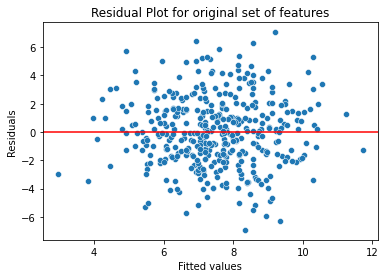

In [29]:
# Original Model

predicted_y = result.fittedvalues
residuals = result.resid

sns.scatterplot(predicted_y, residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual Plot for original set of features')
plt.axhline(y=0, color='red');

C:\Users\pranj\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


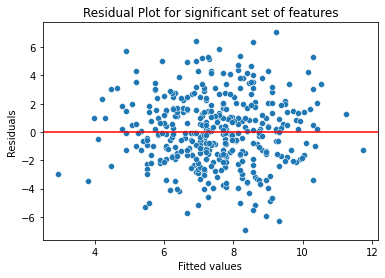

In [30]:
# Smaller Model

predicted_y_small = result_small.fittedvalues
residuals_small = result_small.resid

sns.scatterplot(predicted_y_small, residuals_small)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual Plot for significant set of features')
plt.axhline(y=0, color='red');

Both models fit the data equally well, as indicated by the R-squared value = 0.239 and the residuals plot

Figure(432x288)


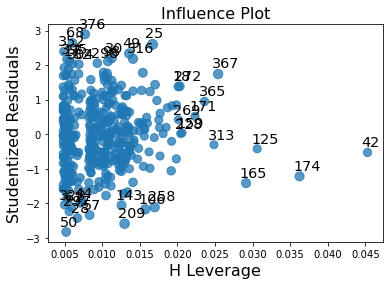

In [31]:
# Original Model

print(sm.graphics.influence_plot(result, criterion='cooks', size=10));

Figure(432x288)


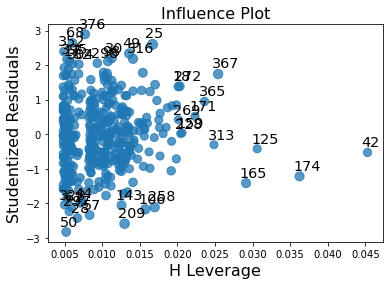

In [32]:
# Smaller Model

print(sm.graphics.influence_plot(result, criterion='cooks', size=10));

### Part (g)

In [33]:
beta1 = result_small.params[1]
beta2 = result_small.params[2]
stderr1 = result_small.bse[1]
stderr2 = result_small.bse[2]
print('95% confidence interval for coeff of Price in smaller model: [{:0.3f}, {:0.3f}]'.format(beta1 - 2*stderr1, beta1 + 2*stderr1))
print('95% confidence interval for coeff of US in smaller model: [{:0.3f}, {:0.3f}]'.format(beta2 - 2*stderr2, beta2 + 2*stderr2))

95% confidence interval for coeff of Price in smaller model: [-0.065, -0.044]
95% confidence interval for coeff of US in smaller model: [0.683, 1.717]


### Part (h)

## Q11

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

In [35]:
np.random.seed(1)
x = np.random.normal(loc = 0, scale = 1, size = 100)
y = 2*x + np.random.normal(size = 100)

df = pd.DataFrame({'y': y, 'x': x})
y = df.loc[:, df.columns == 'y']
x = df.loc[:, df.columns == 'x']

### Part (a)

In [36]:
model_ytox_wo_intercept = sm.OLS(y, x)
result_ytox_wo_intercept = model_ytox_wo_intercept.fit()

print('Coefficient Estimate:')
print(result_ytox_wo_intercept.params)

print('\nStandard Error:')
print(result_ytox_wo_intercept.bse)

print('\nT-statistic:')
print(result_ytox_wo_intercept.tvalues)

print('\nP-value:')
print(result_ytox_wo_intercept.pvalues[0])

print('\nR-squared:')
print(result_ytox_wo_intercept.rsquared)

Coefficient Estimate:
x    2.106742
dtype: float64

Standard Error:
x    0.106445
dtype: float64

T-statistic:
x    19.791802
dtype: float64

P-value:
3.457375739189348e-36

R-squared:
0.7982537438695971


### Part (b)

In [37]:
model_xtoy_wo_intercept = sm.OLS(x, y)
result_xtoy_wo_intercept = model_xtoy_wo_intercept.fit()

print('Coefficient Estimate:')
print(result_xtoy_wo_intercept.params)

print('\nStandard Error:')
print(result_xtoy_wo_intercept.bse)

print('\nT-statistic:')
print(result_xtoy_wo_intercept.tvalues)

print('\nP-value:')
print(result_xtoy_wo_intercept.pvalues[0])

print('\nR-squared:')
print(result_xtoy_wo_intercept.rsquared)

Coefficient Estimate:
y    0.378904
dtype: float64

Standard Error:
y    0.019145
dtype: float64

T-statistic:
y    19.791802
dtype: float64

P-value:
3.4573757391893976e-36

R-squared:
0.7982537438695971


Both the models have the same fit on the data, as indicated by same R-squared values

### Part (f)

In [38]:
model_ytox_w_intercept = sm.OLS(y, sm.add_constant(x))
result_ytox_w_intercept = model_ytox_w_intercept.fit()

print('T-statistic for H: beta1 = 0:')
print(result_ytox_w_intercept.tvalues[1])

T-statistic for H: beta1 = 0:
19.782585315629255


In [39]:
model_xtoy_w_intercept = sm.OLS(x, sm.add_constant(y))
result_xtoy_w_intercept = model_xtoy_w_intercept.fit()

print('T-statistic for H: beta1 = 0:')
print(result_xtoy_w_intercept.tvalues[1])

T-statistic for H: beta1 = 0:
19.782585315629255


T-statistic is same for both the models

## Q12

### Part (a)

Coefficient estimate is same for regression of X onto Y and regression of Y onto X for sigma(x^2) = sigma(y^2)  

### Part (b)

Previous example itself is an example when they are not equal!

### Part (c)

Example when they are equal is when y is just a permuted vector of x

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

In [41]:
np.random.seed(1)
x = np.random.normal(loc = 0, scale = 1, size = (100, 1))
y = np.random.permutation(x)

In [42]:
model = sm.OLS(y, x)
result = model.fit()
print('Coefficient for y onto x:')
print(result.params[0])

Coefficient for y onto x:
0.21456723150810011


In [43]:
model = sm.OLS(x, y)
result = model.fit()
print('Coefficient for x onto y:')
print(result.params[0])

Coefficient for x onto y:
0.21456723150810006


As we can observe, the coefficients for both ways is same

## Q13

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

### Part (a)

In [45]:
np.random.seed(1)
x = np.random.normal(size = (100, 1), loc=0, scale=1)

### Part (b)

In [46]:
eps = np.random.normal(size = (100, 1), loc=0, scale=0.5)

### Part (c)

In [47]:
y = -1 + 0.5*x + eps

Length of y: 100

beta0 = -1

beta1 = 0.5

### Part (d)

C:\Users\pranj\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


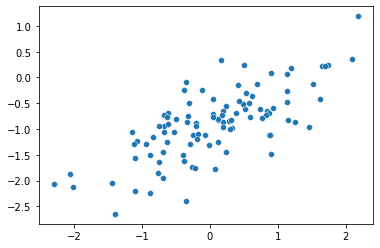

In [48]:
sns.scatterplot(x.reshape(-1), y.reshape(-1));

Relationship can be predicted to be linear

### Part (e)

In [49]:
X = sm.add_constant(x)
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     107.0
Date:                Mon, 19 Apr 2021   Prob (F-statistic):           2.20e-17
Time:                        08:07:49   Log-Likelihood:                -65.124
No. Observations:                 100   AIC:                             134.2
Df Residuals:                      98   BIC:                             139.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9265      0.047    -19.717      0.0

Model obtained is close to the true function, as indicated by the predicted beta values

beta1(hat) = -0.9265 (close to original = -1)

beta2(hat) = -0.5477 (close to original = 0.5)

### Part (f)

C:\Users\pranj\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


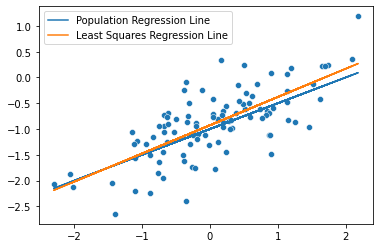

In [50]:
sns.scatterplot(x.reshape(-1), y.reshape(-1))
plt.plot(x, y - eps, label="Population Regression Line")
plt.plot(x, result.params[0] + result.params[1]*x, label="Least Squares Regression Line")
plt.legend();

### Part (g)

In [51]:
x_sq = x*x
X_poly = sm.add_constant(np.concatenate((x, x_sq), axis=1))
model_poly = sm.OLS(y, X_poly)
result_poly = model_poly.fit()

print('P-value for coefficient of squared term:')
print(result_poly.pvalues[2])

print('\nR-squared:')
print(result_poly.rsquared)

P-value for coefficient of squared term:
0.8564999985447264

R-squared:
0.5220007118611885


R-squared for both the models is essentially the same, hence there is no evidence that the addition of quadratic term increases the model fit

Also, there is no evidence for rejecting the null hypothesis for the sqaured term

### Part (h)

In [52]:
#Model with lesser noise compared to original question

x = np.random.normal(size = (100, 1), loc=0, scale=1)
eps = np.random.normal(size = (100, 1), loc=0, scale=0.2)
y = -1 + 0.5*x + eps

C:\Users\pranj\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


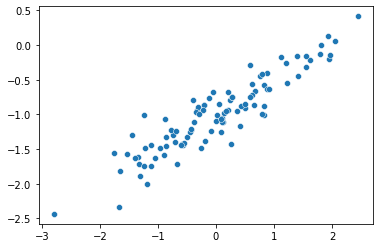

In [53]:
sns.scatterplot(x.reshape(-1), y.reshape(-1));

In [54]:
X = sm.add_constant(x)
model = sm.OLS(y, X)
result_ln = model.fit()
print(result_ln.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     523.3
Date:                Mon, 19 Apr 2021   Prob (F-statistic):           4.35e-41
Time:                        08:07:50   Log-Likelihood:                 12.946
No. Observations:                 100   AIC:                            -21.89
Df Residuals:                      98   BIC:                            -16.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0040      0.021    -46.749      0.0

Model obtained is close to the true function, as indicated by the predicted beta values

beta1(hat) = -1.0040 (close to original = -1)

beta2(hat) = -0.4888 (close to original = 0.5)

C:\Users\pranj\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


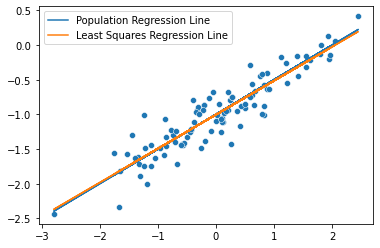

In [55]:
sns.scatterplot(x.reshape(-1), y.reshape(-1))
plt.plot(x, y - eps, label="Population Regression Line")
plt.plot(x, result_ln.params[0] + result_ln.params[1]*x, label="Least Squares Regression Line")
plt.legend();

In [56]:
x_sq = x*x
X_poly = sm.add_constant(np.concatenate((x, x_sq), axis=1))
model_poly = sm.OLS(y, X_poly)
result_poly_ln = model_poly.fit()

print('P-value for coefficient of squared term:')
print(result_poly_ln.pvalues[2])

print('\nR-squared:')
print(result_poly_ln.rsquared)

P-value for coefficient of squared term:
0.5382617667099778

R-squared:
0.8428925256556236


R-squared for both the models is sligthly different, hence there is no evidence that the addition of quadratic term increases the model fit

Also, there is no evidence for rejecting the null hypothesis for the sqaured term

### Part (i)

In [57]:
#Model with greater noise compared to original question

x = np.random.normal(size = (100, 1), loc=0, scale=1)
eps = np.random.normal(size = (100, 1), loc=0, scale=0.7)
y = -1 + 0.5*x + eps

C:\Users\pranj\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


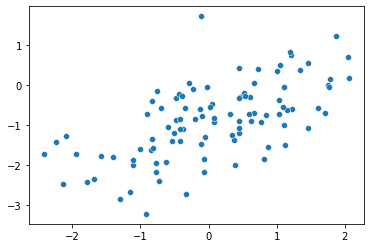

In [58]:
sns.scatterplot(x.reshape(-1), y.reshape(-1));

In [59]:
X = sm.add_constant(x)
model = sm.OLS(y, X)
result_mn = model.fit()
print(result_mn.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     63.09
Date:                Mon, 19 Apr 2021   Prob (F-statistic):           3.36e-12
Time:                        08:07:50   Log-Likelihood:                -110.00
No. Observations:                 100   AIC:                             224.0
Df Residuals:                      98   BIC:                             229.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9162      0.074    -12.453      0.0

Model obtained is close to the true function, as indicated by the predicted beta values

beta1(hat) = -0.9162 (close to original = -1)

beta2(hat) = -0.5632 (close to original = 0.5)

C:\Users\pranj\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


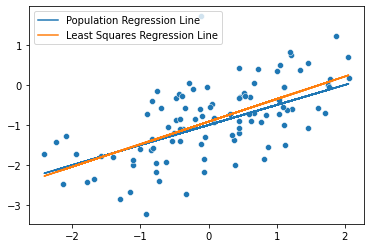

In [60]:
sns.scatterplot(x.reshape(-1), y.reshape(-1))
plt.plot(x, y - eps, label="Population Regression Line")
plt.plot(x, result_mn.params[0] + result_mn.params[1]*x, label="Least Squares Regression Line")
plt.legend();

In [61]:
x_sq = x*x
X_poly = sm.add_constant(np.concatenate((x, x_sq), axis=1))
model_poly = sm.OLS(y, X_poly)
result_poly_mn = model_poly.fit()

print('P-value for coefficient of squared term:')
print(result_poly_mn.pvalues[2])

print('\nR-squared:')
print(result_poly_mn.rsquared)

P-value for coefficient of squared term:
0.7676018471769053

R-squared:
0.39219739733146775


R-squared for the quadratic models is sligthly greater, hence there is evidence that the addition of quadratic term increases the model fit

Also, there is no evidence for rejecting the null hypothesis for the sqaured term

In [62]:
beta1 = result.params[1]
stderr1 = result.bse[1]
print('95% confidence interval for original data set with linear model: [{}, {}]'.format(beta1 - 2*stderr1, beta1 + 2*stderr1))

95% confidence interval for original data set with linear model: [0.4417907513685143, 0.6536363822826575]


In [63]:
beta1 = result_poly.params[1]
stderr1 = result_poly.bse[1]
print('95% confidence interval for original data set with quadratic model: [{}, {}]'.format(beta1 - 2*stderr1, beta1 + 2*stderr1))

95% confidence interval for original data set with quadratic model: [0.43989466101284996, 0.6537249632017454]


In [64]:
beta1 = result_ln.params[1]
stderr1 = result_ln.bse[1]
print('95% confidence interval for less noise data set with linear model: [{}, {}]'.format(beta1 - 2*stderr1, beta1 + 2*stderr1))

95% confidence interval for less noise data set with linear model: [0.44611054473043243, 0.5315867504679911]


In [65]:
beta1 = result_poly_ln.params[1]
stderr1 = result_poly_ln.bse[1]
print('95% confidence interval for less noise data set with quadratic model: [{}, {}]'.format(beta1 - 2*stderr1, beta1 + 2*stderr1))

95% confidence interval for less noise data set with quadratic model: [0.4442190151509684, 0.5305050552211366]


In [66]:
beta1 = result_mn.params[1]
stderr1 = result_mn.bse[1]
print('95% confidence interval for more noise data set with linear model: [{}, {}]'.format(beta1 - 2*stderr1, beta1 + 2*stderr1))

95% confidence interval for more noise data set with linear model: [0.4213960308960195, 0.7050227611109968]


In [67]:
beta1 = result_poly_mn.params[1]
stderr1 = result_poly_mn.bse[1]
print('95% confidence interval for more noise data set with quadratic model: [{}, {}]'.format(beta1 - 2*stderr1, beta1 + 2*stderr1))

95% confidence interval for more noise data set with quadratic model: [0.42184320341736936, 0.7074662532298284]


We see that the 95% confidence interval is smaller for less noisy data, and larger for more noisy data. This shows that we need a larger interval to confirm that there is a 95% chance that the the true value of the parameter will lie in the interval

## Q14

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

### Part (a)

In [69]:
np.random.seed(1)
x1 = np.random.rand(100)
x2 = 0.5*x1 + np.random.normal(size = (100))/10
y = 2 + 2*x1 + 0.3*x2 + np.random.normal(size = (100))

In [70]:
df = pd.DataFrame({'y' : y, 'x1': x1, 'x2': x2})
x = df.loc[:, df.columns != 'y']

Regression coefficients are:

beta0 = 2

beta1 = 1

beta2 = 0.3

### Part (b)

In [71]:
print('Correlation between x1 and x2:')
print(np.corrcoef(x1.transpose(), x2.transpose())[0, 1].round(3))

Correlation between x1 and x2:
0.839


C:\Users\pranj\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


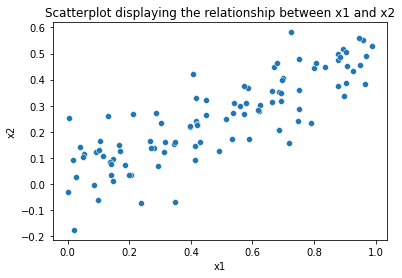

In [72]:
sns.scatterplot('x1', 'x2', data=df)
plt.title('Scatterplot displaying the relationship between x1 and x2');

### Part (c)

In [73]:
X =  sm.add_constant(x)
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     17.09
Date:                Mon, 19 Apr 2021   Prob (F-statistic):           4.40e-07
Time:                        08:07:51   Log-Likelihood:                -142.34
No. Observations:                 100   AIC:                             290.7
Df Residuals:                      97   BIC:                             298.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1893      0.199     11.021      0.0

beta0(hat) = 2.1893 (which is close to the original value of 2)

beta1(hat) = 0.7046 (which is far away from the true value)

beta1(hat) = 2.5024 (which is far away from the true value)

We cannot reject null hypothesis for x1, whereas we can reject null hypothesis for x2 from the p-values

### Part (d)

In [74]:
X =  sm.add_constant(x['x1'])
model = sm.OLS(y, X)
result = model.fit()
print('P-values:')
print(result.pvalues)
print('\nR-squared:')
print(result.rsquared)

P-values:
const    2.942644e-19
x1       6.683125e-07
dtype: float64

R-squared:
0.22380210449292914


When only x1 is taken as the feature, it is statistically significant

There is evidence fo rejecting the null hypothesis

### Part (e)

In [75]:
X =  sm.add_constant(x['x2'])
model = sm.OLS(y, X)
result = model.fit()
print('P-values:')
print(result.pvalues)
print('\nR-squared:')
print(result.rsquared)

P-values:
const    2.952030e-21
x2       1.090964e-07
dtype: float64

R-squared:
0.2511729544915061


When only x2 is taken as the feature, it is statistically significant

There is evidence for rejecting the null hypothesis

### Part (f)

There exists strong collinearity between x1 and x2, hence it seems that the parts c-e contradict each other. The collinearity increases the standard error in the coefficients.

### Part (g)

In [76]:
df.loc[len(df.index)] = [6, 0.1, 0.8]

In [77]:
X =  sm.add_constant(x)
model = sm.OLS(y, X)
result = model.fit()
print('P-values:')
print(result.pvalues)
print('\nR-squared:')
print(result.rsquared)

P-values:
const    8.532403e-19
x1       2.712146e-01
x2       3.060418e-02
dtype: float64

R-squared:
0.260508144074334


In [78]:
X =  sm.add_constant(x['x1'])
model = sm.OLS(y, X)
result = model.fit()
print('P-values:')
print(result.pvalues)
print('\nR-squared:')
print(result.rsquared)

P-values:
const    2.942644e-19
x1       6.683125e-07
dtype: float64

R-squared:
0.22380210449292914


In [79]:
X =  sm.add_constant(x['x2'])
model = sm.OLS(y, X)
result = model.fit()
print('P-values:')
print(result.pvalues)
print('\nR-squared:')
print(result.rsquared)

P-values:
const    2.952030e-21
x2       1.090964e-07
dtype: float64

R-squared:
0.2511729544915061


## Q15

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

In [81]:
df = pd.read_csv(r'.\Data Sets\Boston.csv')

In [82]:
x = df.loc[:, df.columns != 'crim']
x = x.loc[:, x.columns != 'Unnamed: 0']
y = df[['crim']]

In [83]:
univ_reg_coeff = list()

details = {
    'Predictor used': [],
    'P-value of beta1': [],
    'R-squared of model': []
}

### Part (a)

In [84]:
for pred in x.columns:
    model = sm.OLS(y, sm.add_constant(x[pred]))
    result = model.fit()
    
    details['Predictor used'].append(pred)
    details['P-value of beta1'].append(result.pvalues[1].round(5))
    details['R-squared of model'].append(result.rsquared.round(3))
    
    univ_reg_coeff.append(result.params[1])

In [85]:
details_df = pd.DataFrame(details)
details_df

,Predictor used,P-value of beta1,R-squared of model
0,zn,0.00001,0.040
1,indus,0.00000,0.165
2,chas,0.20943,0.003
3,nox,0.00000,0.177
4,rm,0.00000,0.048
5,age,0.00000,0.124
6,dis,0.00000,0.144
7,rad,0.00000,0.391
8,tax,0.00000,0.340
9,ptratio,0.00000,0.084


Evidence of relationship between all predictors and the response, except the predictor 'chas'

### Part (b)

In [86]:
model = sm.OLS(y, sm.add_constant(x))
result = model.fit()

print('P-values:')
print(np.round(result.pvalues, 5))
print('\nR-squared:')
print(result.rsquared)

multi_reg_coeff = result.params.values[1:]

P-values:
const      0.01895
zn         0.01702
indus      0.44429
chas       0.52587
nox        0.05115
rm         0.48309
age        0.93549
dis        0.00050
rad        0.00000
tax        0.46379
ptratio    0.14661
black      0.04070
lstat      0.09621
medv       0.00109
dtype: float64

R-squared:
0.45401038980421493


Null hypothesis can be rejected for 'zn', 'dis', 'rad', 'black' and 'medv'

### Part (c)

Lower rejection of null hypoythesis indicates existence of correlation

R-sqaured for multiple regression model is larger than the largest r-sqaured in any simple regression model, which indicates imporvement in the model fit

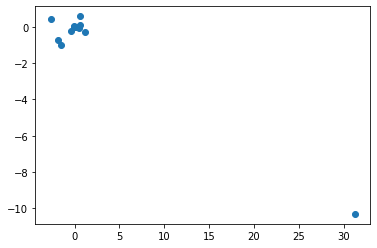

In [87]:
plt.plot(univ_reg_coeff, multi_reg_coeff, lw=0, marker='o');

### Part (d)

In [88]:
details_poly = {
    'Predictor used': [],
    'P-value of coeff of X': [],
    'P-value of coeff of X_sq': [],
    'P-value of coeff of X_cube': [],
    'R-squared of model': []
}

In [89]:
for pred in x.columns:
    X = x[pred].values.reshape(-1,1)
    X_sq = X*X
    X_cube = X_sq * X
    X_poly = sm.add_constant(np.concatenate((X, X_sq, X_cube), axis=1))

    model_poly = sm.OLS(y, X_poly)
    result_poly_ln = model_poly.fit()
    
    details_poly['Predictor used'].append(pred)
    details_poly['P-value of coeff of X'].append(result_poly_ln.pvalues[1].round(5))
    details_poly['P-value of coeff of X_sq'].append(result_poly_ln.pvalues[2].round(5))
    details_poly['P-value of coeff of X_cube'].append(result_poly_ln.pvalues[3].round(5))
    details_poly['R-squared of model'].append(result_poly_ln.rsquared.round(3))

In [90]:
details_poly_df = pd.DataFrame(details_poly)
details_poly_df

,Predictor used,P-value of coeff of X,P-value of coeff of X_sq,P-value of coeff of X_cube,R-squared of model
0,zn,0.00261,0.09375,0.22954,0.058
1,indus,0.00005,0.00000,0.00000,0.260
2,chas,0.20943,0.20943,0.20943,0.003
3,nox,0.00000,0.00000,0.00000,0.297
4,rm,0.21176,0.36411,0.50858,0.068
5,age,0.14266,0.04738,0.00668,0.174
6,dis,0.00000,0.00000,0.00000,0.278
7,rad,0.62342,0.61301,0.48231,0.400
8,tax,0.10971,0.13747,0.24385,0.369
9,ptratio,0.00303,0.00412,0.00630,0.114


Clear evidence of non-linear relationship with 'indus', 'nox', 'dis', 'ptratio', 'medv'